In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
plt.rcParams['figure.dpi'] = 120
import umap
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#   делаем


In [3]:
df_train['Alley'].fillna('no access', inplace=True)
df_train['BsmtQual'].fillna('no basement', inplace=True)
df_train['BsmtCond'].fillna('no basement', inplace=True)
df_train['BsmtFinType1'].fillna('no basement', inplace=True)
df_train['BsmtFinType2'].fillna('no basement', inplace=True)
df_train['FireplaceQu'].fillna('no Fireplace', inplace=True)
df_train['GarageType'].fillna('no Garage', inplace=True)
df_train['GarageFinish'].fillna('no Garage', inplace=True)
df_train['GarageQual'].fillna('no Garage', inplace=True)
df_train['GarageCond'].fillna('no Garage', inplace=True)
df_train['PoolQC'].fillna('no Pool', inplace=True)
df_train['Fence'].fillna('no Fence', inplace=True)
df_train['MasVnrType'].fillna('no type', inplace=True)
df_train['MasVnrArea'].fillna(0, inplace=True)
df_train['BsmtExposure'].fillna('no exposure', inplace=True)
df_train['MiscFeature'].fillna('none', inplace=True)
df_train['Electrical'].fillna('SBrkr', inplace=True)
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean(), inplace=True)

In [4]:
#датафрейм с категориальными
#df = pd.concat([df_train, df_test], axis=0)
df= df_train
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,MnPrv,none,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,4,2010,WD,Normal,142125


In [5]:
object_columns = list(df.select_dtypes("object").columns)


In [6]:
df_dum = pd.DataFrame()

In [7]:
for column in object_columns:
    df_dum = pd.concat([df_dum, pd.get_dummies(df[column], prefix=column)], axis=1)

In [8]:
# датафрейм OneHotEncoding
df_dum

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_no access,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [9]:
df_int =df.select_dtypes(exclude='object')
df_int

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [10]:
# Создаем новый датафрейм, объединяя исходный датафрейм с новым. 
df_concat = pd.concat([df.select_dtypes(exclude='object'), df_dum], axis=1)
df_concat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [11]:
df_noid_price = df_concat.drop(['Id', "SalePrice"], axis=1)
df_noid_price

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [12]:
#реализуем функцию для избавления от нулей и NaN

null_cols = []
zero_cols = []
for col in df_int.columns:
    nans_percent = sum(df_int[col].isna()) / len(df_int) * 100
    if df_int[col].sum() == 0:
        zero_cols.append(col)
    if nans_percent > 50:
        null_cols.append(col)
    null_cols.extend(zero_cols)
    
df_int_clear = df_int.drop(null_cols, axis=1)
    
for col in df_int_clear.columns:
    if df_int_clear[col].isna().sum() != 0:
        df_int_clear[col] = df_int_clear[col].fillna(df_int_clear[col].mean())

In [13]:
df_int_clear

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [14]:
#for col in df_int_clear.columns:
#    if df_int_clear[col].dtype in ['int64', 'float64'] and df_int_clear[col].isna().sum() != 0:
#        df_int_clear[col].fillna(df_int_clear[col].mean(), inplace=True)

In [15]:
target = 'SalePrice'
x = df_int_clear[:len(df_int_clear['SalePrice'])].to_numpy()
y = df_int_clear[target][:len(df_int_clear['SalePrice'])].to_numpy()
x.shape, y.shape

((1460, 38), (1460,))

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.35, random_state=1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((949, 38), (511, 38), (949,), (511,))

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_valid_norm = scaler.transform(x_valid)
x_train_norm.shape, x_valid_norm.shape

((949, 38), (511, 38))

In [18]:
df_int_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [20]:
X = df_int_clear[df_int_clear.columns[1:]]

In [21]:
X = StandardScaler().fit_transform(X)

In [22]:
X

array([[ 0.07337496, -0.22937175, -0.20714171, ..., -1.5991111 ,
         0.13877749,  0.34727322],
       [-0.87256276,  0.4519361 , -0.09188637, ..., -0.48911005,
        -0.61443862,  0.00728832],
       [ 0.07337496, -0.09311018,  0.07347998, ...,  0.99089135,
         0.13877749,  0.53615372],
       ...,
       [ 0.30985939, -0.18395123, -0.14781027, ..., -0.48911005,
         1.64520971,  1.07761115],
       [-0.87256276, -0.09311018, -0.08016039, ..., -0.8591104 ,
         1.64520971, -0.48852299],
       [-0.87256276,  0.22483348, -0.05811155, ..., -0.1191097 ,
         0.13877749, -0.42084081]])

In [23]:
pca = PCA(2)
tsne = TSNE(2, perplexity=30)
umap = UMAP(n_components=2, n_neighbors=100)

X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)
X_umap = umap.fit_transform(X)

In [25]:
import umap



Text(0.5, 1.0, 'UMAP')

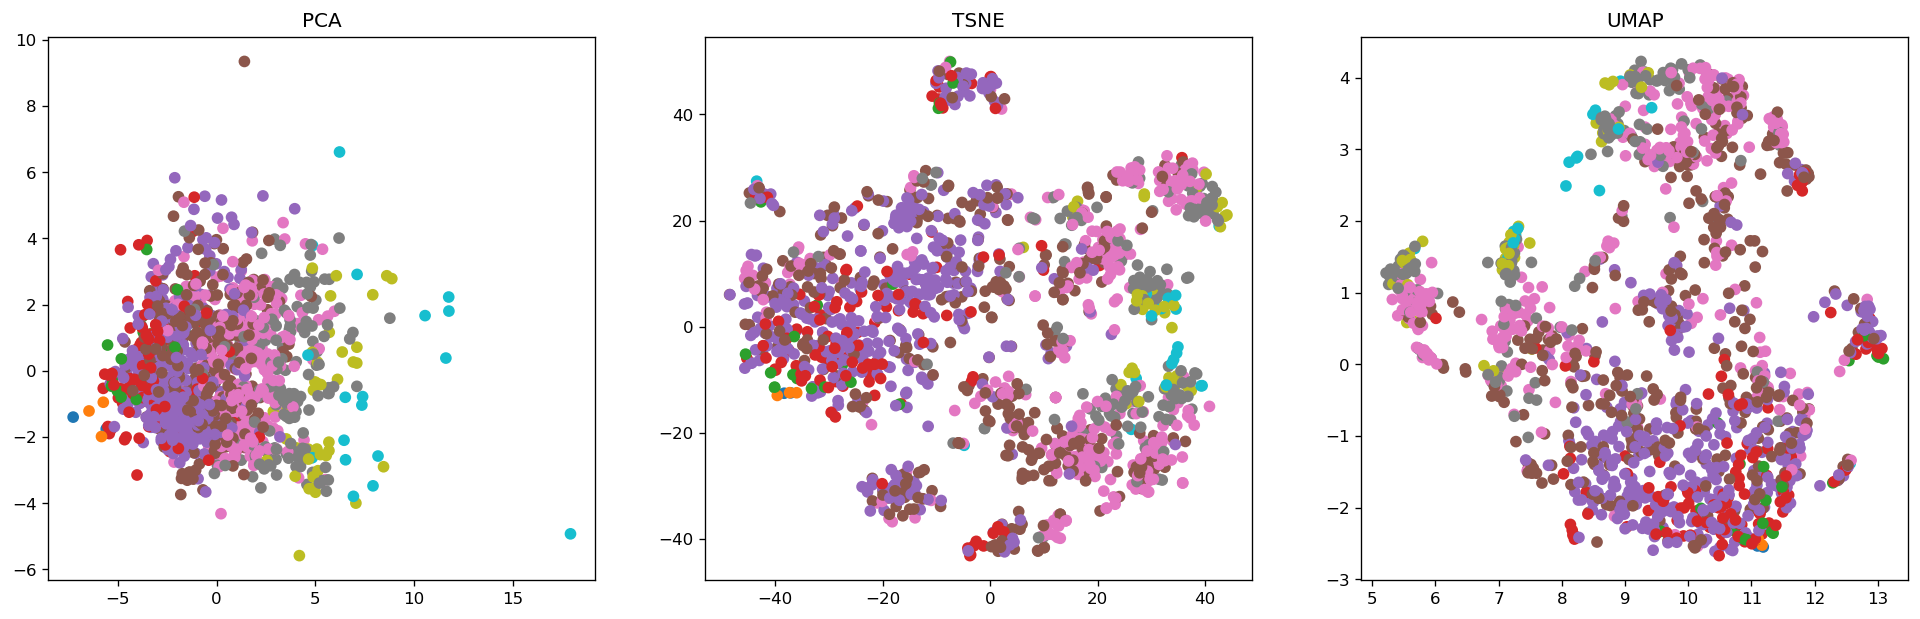

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

colors = [sns.color_palette()[x] for x in df_int_clear.OverallQual.map({1:0, 2:1, 3:2,4:3,5:4,6:5,7:6,8:7,9:8,10:9})]

ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)
ax3.scatter(X_umap[:, 0], X_umap[:, 1], c=colors)

ax1.set_title('PCA')
ax2.set_title('TSNE')
ax3.set_title('UMAP')